In [1]:
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
import sys
# Note: This is how to use locally hosted functions.
#sys.path.append('/home/z3526974/Work/code/Shelf_moorings/pssa')
# from mySSA import mySSA
#
%matplotlib inline

# matplotlib notebook
# instead of using inline this may make zoomable plots - see bmp120gtmatplotlibNotebook

plt.rcParams['figure.figsize'] = (12,8)

In [2]:
pwd

'C:\\Users\\Stuart\\Python_Projects_2020\\BMP2020'

In [3]:
datapath = 'data\\'
#ch100 = xr.open_dataset(datapath + 'IMOS_ANMN-NSW_TZ_20090815_CH100_FV02_TEMP-gridded-timeseries_END-20190522_C-20200108.nc')
bmp120gt = xr.open_dataset(datapath + 'IMOS_ANMN-NSW_TZ_20110329_BMP120_FV02_TEMP-gridded-timeseries_END-20200327_C-20200519.nc')
bmp120gt.TEMP


<xarray.DataArray 'TEMP' (TIME: 67626, DEPTH: 12)>
[811512 values with dtype=float32]
Coordinates:
  * TIME       (TIME) datetime64[ns] 2011-03-29T22:00:00 ... 2020-03-27T20:00:00
  * DEPTH      (DEPTH) float32 10.0 20.0 30.0 40.0 ... 90.0 100.0 110.0 120.0
    LATITUDE   float64 ...
    LONGITUDE  float64 ...
Attributes:
    standard_name:  sea_water_temperature
    units:          degrees_Celsius
    cell_methods:   TIME:median DEPTH: point
    valid_min:      -2.5
    long_name:      sea_water_temperature
    valid_max:      40.0

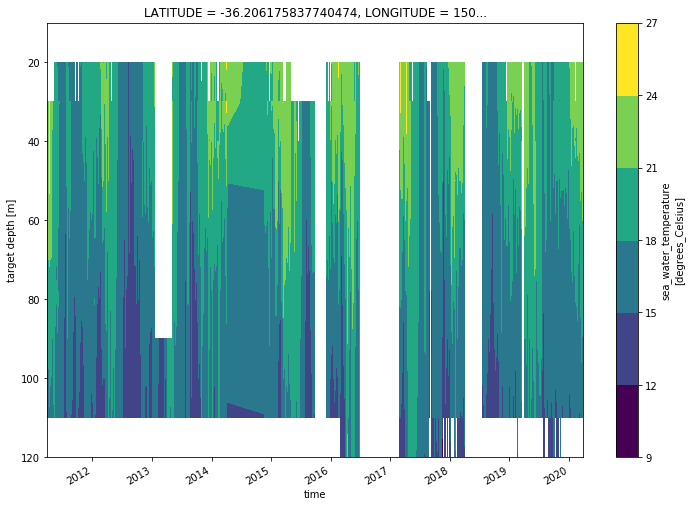

In [4]:
# Plot 1
bmp120gt.TEMP.plot.contourf(x = 'TIME',yincrease=False)
# Note: xarry is plotting here. Thats why commands are so succint. xarray is a shorthand or 'layer'. Matplotlib would be a few more lines of code. The good thing is by using the xarray "wrapper" 
# can still use matplotlib commands to modify graphs. Check out the xarray docs http://xarray.pydata.org/en/stable/plotting.html


Text(0.5, 1.0, 'BMP120 @20m')

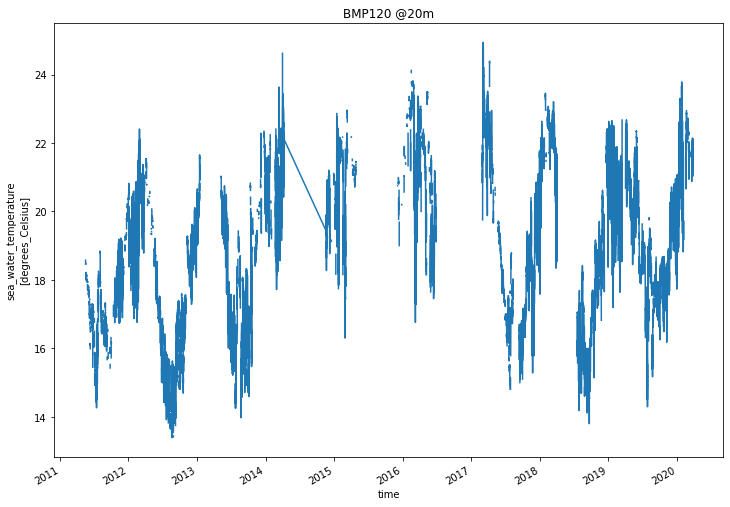

In [5]:
# Plot2
bmp120gt.TEMP.sel(DEPTH=20).plot(x = 'TIME')
plt.title('BMP120 @20m')
# changed depth to 20m

In [6]:
# Slice not working - problem fixed with .loc (see below)

#We are using xarray here not pandas so evertything works a bit differently
#try this
# ds.sel(time=slice("2000-06-01", "2000-06-10"))


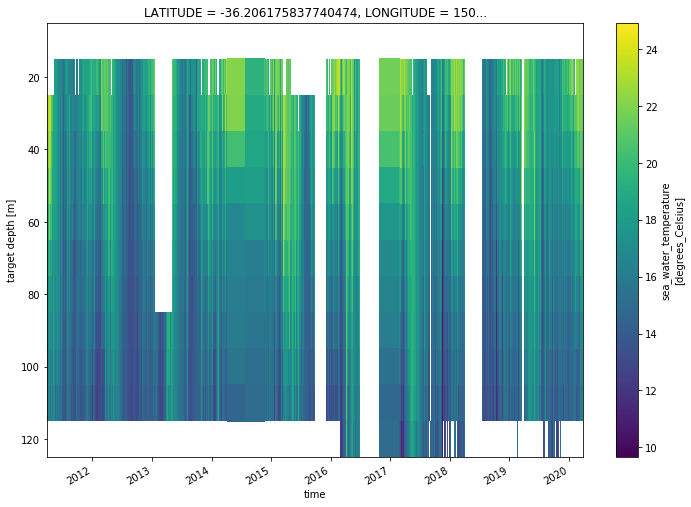

In [7]:
# plot 3 - very similar to plot 1 
bmp120gt.TEMP.plot(x = 'TIME',yincrease=False)

In [9]:
# Note: have created 2 further notebooks to work on dynamic examples in matplotlib (bmp120gt_matplotlibNotebook) and plotly (bmp120gt_plotly. 

In [ ]:
import chart_studio.plotly as py
import plotly.graph_objs as go

energy_data = go.Scatter(x=bmp120gt.TEMP.sel(DEPTH=20),
                         y=bmp120gt.TIME)

In [ ]:
layout = go.Layout(title='Energy Plot', xaxis=dict(title='Date'),
                   yaxis=dict(title='(kWh)'))

In [ ]:
py.offline.init_notebook_mode(connected=True)
fig = go.Figure(data=[energy_data], layout=layout)
py.iplot(fig, sharing='public')

In [ ]:
bmp120gt.TEMP

In [ ]:
from IPython.display import display


display(bmp120gt)

In [ ]:
import plotly.graph_objects as go
fig = go.Figure(data=go.Bar(y=[2, 3, 1]))
fig.show()

In [ ]:
import plotly.express as px

df = px.data.iris()
fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species", title="A Plotly Express Figure")

# If you print the figure, you'll see that it's just a regular figure with data and layout
# print(fig)

fig.show()

In [ ]:
import plotly.express as px

df = px.data.iris()
fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species", title="A Plotly Express Figure")

# If you print the figure, you'll see that it's just a regular figure with data and layout
# print(fig)

fig.show()

NameError: name 'ax2' is not defined

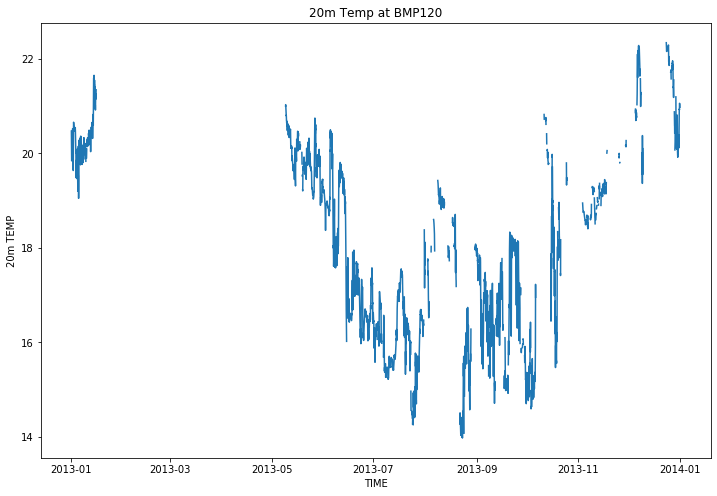

In [10]:
# Using matplotlib Eg1 on Plot 2 - got slice working with .loc

from matplotlib import pyplot as plt

x = bmp120gt.TIME
y = bmp120gt.TEMP.sel(DEPTH=20)
xslice = x.loc['2013':'2013'] # ugly but works
yslice = y.loc['2013':'2013'] 
plt.figure(figsize=(12,8)) # width, height

plt.plot(xslice,yslice)

plt.title('20m Temp at BMP120')
plt.ylabel('20m TEMP')
plt.xlabel('TIME')
ax2.yaxis.set_ticks_position('none') 
plt.show()

In [ ]:
# Using matplotlib Eg2 on Plot 2 - useful - increased figure size/ multiple data

x1 = bmp120gt.TIME
y1 = bmp120gt.TEMP.sel(DEPTH=20)
x2 = bmp120gt.TIME
y2 = bmp120gt.TEMP.sel(DEPTH=100)

plt.figure(figsize=(12,8)) # width, height
plt.plot(x1 ,y1 ,'g',label='20m Temp', linewidth=1)
plt.plot(x2,y2,'c',label='100m Temp',linewidth=1)
plt.title('20m and 100m Temp at BMP120')
plt.ylabel('Temp')
plt.xlabel('Time')
plt.legend()
plt.grid(True,color='k')
plt.show()

In [ ]:
# Using matplotlib Eg3 on Plot 2 - changed scatterplot back to line - 
# Example 3 - with scatterplot/ subplots

import matplotlib.pyplot as plt
%matplotlib inline

# Create Figure and Subplots
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(9,5), sharey=True, dpi=120)

# Plot
#ax1.plot(x1, y1, 'go')  # greendots
ax1.plot(x1.loc['2013':'2013'],y1.loc['2013':'2013'],'g',label='20m Temp', linewidth=1)
ax1.plot(x2.loc['2013':'2013'],y2.loc['2013':'2013'],'c',label='100m Temp', linewidth=1)
# plt.legend() - No handles with labels error ???
#ax2.plot(x2, y2, 'b*')  # bluestars
ax2.plot(x1.loc['2014':'2014'],y1.loc['2014':'2014'],'g',label='20m Temp', linewidth=1)
ax2.plot(x2.loc['2014':'2014'],y2.loc['2014':'2014'],'c',label='100m Temp',linewidth=1)
plt.legend()

# Title, X and Y labels, X and Y Lim
ax1.set_title('2013 - 20m and 100m Temp'); ax2.set_title('2014 - 20m and 100m Temp')
ax1.set_xlabel('Time');  ax2.set_xlabel('Time')  # x label
ax1.set_ylabel(' Temp');  ax2.set_ylabel('')  # y label
#ax1.set_xlim(2011, 2020) ;  ax2.set_xlim(2011, 2020)   # x axis limits
#ax1.set_ylim(0, 12);  ax2.set_ylim(0, 12)  # y axis limits
ax2.yaxis.set_ticks_position('none') 
plt.tight_layout()
plt.show()




In [ ]:
# Some progress here - could make a plot for each year and each depth but would be nicer to get dynamic plotting working
# Lets go back to plotly...

In [ ]:
# another ideas
# depth by time plots 
# use groupby to get annual mean in xarray
# ctd casts ??

# low pass filter to get rid of noise - also trends

# meet monday at 12pm

# how gridded data set is created

bmp120gt.DEPTH





In [ ]:
# Try to make  a depth/time plot
from matplotlib import pyplot as plt

x = bmp120gt.TEMP.sel(TIME='2011-03-29T23:00:00.000000000')
y = bmp120gt.DEPTH
plt.plot(x,-y)



#xslice = x.loc['2013':'2013'] # ugly but works
#yslice = y.loc['2013':'2013'] 
#plt.figure(figsize=(12,8)) # width, height



#plt.title('20m Temp at BMP120')
#plt.ylabel('20m TEMP')
#plt.xlabel('TIME')
#ax2.yaxis.set_ticks_position('none') 
plt.show()

In [ ]:

bmp120gt.TEMP.mean(dim='TIME').plot(y='DEPTH')
plt.title('Average Temp Profile at BMP120')


In [ ]:
bmp120gt.TIME


In [ ]:
bmp120gt.TEMP.sel(TIME='2015-03-29T22:00:00.000000000').plot(y='DEPTH', yincrease=False)
plt.xlim=0

In [ ]:
# improve dataset
#some time points only have 30m temp and below. Interpolate top layer from sst? and ctd casts?


In [ ]:
bmp_annual_means = bmp120gt.TEMP.resample(TIME="1Y").mean()

for x in range(9):
    bmp_annual_means[x].plot(y='DEPTH',yincrease=False)
    
plt.legend()


In [ ]:
# change to seasonal sub 3M for 1Y

# xarray

# https://github.com/jbusecke/xmovie
